<a href="https://colab.research.google.com/github/ziqlu0722/Machine-Learning/blob/master/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models And EM Algorithm

Notice:

* Purpose of this notebook is for self-study
* Content are summarized from [Andrew Ng's Lecture and Notes](http://cs229.stanford.edu/notes/cs229-notes8.pdf)

## 1. Concept

###1.1 Jensen's Inequeality

> $f(E[x]) \leq E[f(x)]$ if $f$ is strictly convex $(f'' > 0)$

> $f(E[x]) \geq E[f(x)]$ if $f$ is strictly concave $(f’’ < 0)$


*Intuition: *

<img src="http://drive.google.com/uc?export=view&id=1ARyWCT2alzk_Dbggp2etdE4n1X-EQ1LC" width="600">


> Therefore, $ln~E[x] \geq E[ln~x]$, equal when $ x = E(x) $ $i.e.$, if $X$ is a constant

> because $f(x) = ln~x$ is strictly concave for $ x > 0$, as

> \begin{align} f''(x) = \frac{d~}{dx} f'(x) = \frac{d~\frac{1}{x}}{dx} = -\frac{1}{x^2} < 0 \end{align}


### 1.2 Likelihood Function for Unsupervised Clustering

Suppose we have an estimation problem in which we have a training set
(${x_{(1)}
, . . . , x_{(m)}} $) consisting of $m$ independent examples. No labels, only $x$ observed.

We want to get the parameters for the model $p(x,z)$, whose likelihood function is:

\begin{align}
L(\Theta)=\prod_{i}p(x^{(i)};\Theta)\end{align}log likelihood function is \begin{align}\ell(\Theta)=\sum_{i}ln~p(x^{(i)}; \Theta) = \sum_{i} ln \sum_{z^{(i)}} p(x^{(i)}, z^{(i)}; \Theta)\end{align}

This, naturally, introduces a latent (a.k.a. hiddent/unobserved) variable $z = (z^1, ..., z^m)$, which is multinomial: $z^i$ indicates which distribution a specific point $x^i$
belongs to. If we know $z$, the MLE will be easy. However here we do not know the latent variable $z$ that indicate each data point's membership.

Maximizing $\ell(\Theta)$ explicitly might be difficult (no closed form solution), and our strategy will be to instead repeatedly construct a lower-bound on
(E-step), and then optimize that lower-bound (M-step).

###1.3 E(Expectation) - M(Maximization) Algorithm

EM is an iterative algorithm that consists of two steps:

* E-step: This gives a tight lower bound for $\ell (\Theta)$

* M-step: Update parameters to maximize the lower bound 


####1.3.1 Derive Lower Bound of Log-likelihood Function

For each $i$, let $r_i$ be some distribution over the $z$’s $(~\Sigma_
z r_i(z) = 1, r_i(z) ≥0~).$ Consider the following:

\begin{align} \ell(\Theta) & = \sum_i ln~\sum_{z^{(i)}} p(x^{(i)}, z^{(i)}; \Theta)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(1)}
\\ & = \sum_i ln~\sum_{z^{(i)}} r_i(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(2)}\\ & = \sum_i ln~E_{z^{(i)} \sim r_i(z^{(i)})}\Big[ \frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})} \Big]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(3)}\\
&\geq \sum_i E_{z^{(i)} \sim r_i(z^{(i)})} \Big[ ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})} \Big]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(4)} \\ & = \sum_i \sum_{z^{(i)}} r_i(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(5)} \end{align}

$(2)$ >> $(3)$: because $\sum_{z^{(i)}} r_i(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}$ takes the form of Expectationrof $ \frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}$

$(3)$ >> $(4)$: because of *Jensen's Inequality* $ln~E[x] \geq E[ln~x]$

$(4)$ >> $(5)$: convert Expectation of $x$ back into Probability * $x$

 Now, for any set of distributions $r_i$
, the formula $(5)$ is gives a lower-bound
on $\ell(\Theta)$. 

#### 1.3.2 Derive Tight Lower Bound of Log-likelihood Function

As we would like to maximize $\ell(\Theta)$, it is natural we maximize the lower bounds(with certain $\Theta$)  that is most closed to $\ell(\Theta)$. $i.e.$ We need to find the **tight bound**, where the equaity of Jensen's Inequality holds. $i.e.$ $x = E(x) = constant, i.e.$

\begin{align}\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})} = c\end{align}

and $r_i(z^{(i)}) \propto p(x^{(i)}, z^{(i)}; \Theta)~~ s.t. \sum_{z^{(i)}} ~r_i(z^{(i)}) = 1$

so $\sum_z p(x^{(i)}, z; \Theta) = c$. Thus, \begin{align}\\r_i(z^{(i)}) & = \frac{p(x^{(i)}, z^{(i)}; \Theta)}{\sum_z p(x^{(i)}, z; \Theta)} \\ & = \frac{p(x^{(i)}, z^{(i)}; \Theta)}{p(x^{(i)}; \Theta)} \\ & = p(z^{(i)}\vert x^{(i)}; \Theta) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(6)\end{align}


The last term $(6)$ is actually the posterior distribution of $z^{(i)}$ (soft membership) given the observation $x^{(i)}$ and the paramter Θ.

In Gaussian Mixture Models, set \begin{align} r_c^{(i)} = \frac{\phi_c~\mathcal{N}(x_i; \mu_c, \Sigma_c)}{\sum_{c'}\phi_c~\mathcal{N}(x_i; \mu_c, \Sigma_c)}\end{align}
 
Now, for this choice of the $r^{(i)}$’s, Equation $(5)$ gives a lower-bound on the
loglikelihood $\ell (\Theta)$ that we’re trying to maximize.

####1.3.3 Maximize the Tight Lower Bound

Particularly in Gaussian Mixture Models, suppose we have (${x_{(1)}
, . . . , x_{(m)}} $) consisting of $m$ independent examples from $c$ different Gaussian distributions. And:
 
 * $\mu_c$: the mean of the $c^{th}$ Gaussian component
 
 * $\Sigma_c$: the covariance matrix of the 
$c^{th}$ Gaussian component

* $\Phi_c$: the multinomial parameter of a specific datapoint belonging to the $c^{th}$ componenet.

* $z^{(i)}$: the latent variable (multinomial) for each  $x_i$

set $ \nabla_{\mu_c} ll= 0$, and get update rule for $\mu_c$: \begin{align} \mu_c = \frac{\sum_{i}^{m} r_c^{(i)} x^{(i)}}{\sum_{i}^{m} r_c^{(i)}} \end{align}

set $ \nabla_{\Sigma_c} ll= 0$, and get update rule for $\Sigma_c$: \begin{align} \frac{\sum_i^{m} r_c^{(i)} (x^{(i)}-\mu_c)(x^{(i)}-\mu_c)^{T}}{\sum_i^{m} r_c^{(i)}} \end{align}

set $ \nabla_{\Phi_c} ll= 0$, and get update rule for $\Phi_c$: \begin{align} \phi_c = \frac{\sum_i r_c^{(i)}}{m} \end{align}

####1.3.3 Coordinate Ascent

Suppose θ(t) and θ(t+1) are the parameters from two successive iterations of EM. 

Proof of $\ell(\Theta^{(t+1)}) \geq \ell(\Theta^{(t)})$ (EM always monotonically improves the log-likelihood):

\begin{align}\ell(\Theta^{(t)})= \sum_i \sum_{z^{(i)}} r_i^{(t)}(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta^{(t)})}{r_i^{(t)}(z^{(i)})}\end{align}

\begin{align} \ell(\Theta^{(t+1)}) & \geq \sum_i \sum_{z^{(i)}} r_i^{(t)}(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta^{(t+1)})}{r_i^{(t)}(z^{(i)})} ~~~~~~~~~~~~~~~~~~{(7)}\\ & \geq \sum_i \sum_{z^{(i)}} r_i^{(t)}(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta^{(t)})}{r_i^{(t)}(z^{(i)})}~~~~~~~~~~~~~~~~~~~~~~{(8)} \\ & = \ell(\Theta^{(t)})~~~ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{(9)}\end{align}

$(7)$  because: \begin{align} \ell(\Theta & \geq \sum_i \sum_{z^{(i)}} r_i(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}\end{align}

$(7)$ >> $(8)$ because: $\Theta^{(t+1)}$ is chosen explicityly to be \begin{align}argmax_{\Theta} \sum_i \sum_{z^{(i)}} r_i(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}\end{align}

$(8)$ >> $(9)$ because: $\Theta^{(t)}$ is chosen to make Jensen's inequality hold with equality at $\Theta^{(i)}$

> If we define

\begin{align} J(r, \Theta) & \geq \sum_i \sum_{z^{(i)}} r_i(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}\end{align},

then we know $\ell(\Theta^{(t+1)}) \geq J(r, \Theta)$. EM can be viewed a coordinate ascent on $J$, in which the E-step maximizes it with respect to $r$, and the M-step maximizes it with respect to $\theta$

####1.3.3 Steps Summary

Repeat until convergence 

(if the increase in $\ell(θ)$ between successive iterations is smaller than
some tolerance parameter) 

{

 * **(E-step):**  set
 
 \begin{align}r_i(z^{(i)}) = p(z^{(i)}\vert x^{(i)}; \Theta)\end{align}
  
  which gives a tight lower bound for ℓ(Θ).

 *  **(M-step)**: set
 
 \begin{align}\Theta = argmax_{\Theta} \sum_i \sum_{z^{(i)}} r_i(z^{(i)})ln~\frac{p(x^{(i)}, z^{(i)}; \Theta)}{r_i(z^{(i)})}\end{align}
 
 updating parameters to maximize the tight lower bounds.                                                           

}

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate Data

In [0]:
# original parameter

mean_1 = [3,3]; cov_1 = [[1,0],[0,3]]; n1 = 2000
mean_2 = [7,4]; cov_2 = [[1,0.5],[0.5,1]]; n2 = 4000

In [0]:
# create data

d1 = np.random.multivariate_normal(mean_1, cov_1, n1)
d2 = np.random.multivariate_normal(mean_2, cov_2, n2)
data = np.concatenate((d1, d2), axis = 0)

In [0]:
# shuffle data

def shuffle_data(x):
  index = np.arange(x.shape[0])
  np.random.shuffle(index)
  return x[index]

In [0]:
data = shuffle_data(data)

In [0]:
# check data dimensions

data.shape

(6000, 2)

## 2. Build Algorithm

In [0]:
from scipy.stats import multivariate_normal

class GMM:
  def __init__(self):
    self.pi = None
    self.mu = None
    self.cov = None
        
  def fit(self, X, num_class):
    self.X = X.copy()
#     self.epoch = epoch
    self.num_class = num_class
    self.data = X
    self.x, self.y = X.T
    self.num_data, self.dim = X.shape
    """INITIALIZE PARAMETERS -> mu, sigma and pi"""
    self.reg_cov = 1e-6 * np.identity(self.dim) # this to avoid singularity   
    self._fit()
    return self.mu, self.cov
    
  def _init_param(self):
    """ 1. Set the initial mu, covariance and pi values"""
    self.pi = np.ones(self.num_class)/self.num_class
    self.mu = np.random.uniform(low = np.min(self.data), high = np.max(self.data), size=(self.num_class, self.dim)) # num of class * num of dim matrix
    self.cov = np.array([np.identity(self.dim) for i in range(self.dim)])
    
  def _fit(self):
    epsilon = 1e-4
    self._init_param()

    # set the threshold to stop iteration
    num_iters = 0
    ll = 1
    previous_ll = 0
    while(ll-previous_ll > epsilon):
        previous_ll = self.loglikelihood()
        self._e_step()
        self._m_step()
        num_iters += 1
        ll = self.loglikelihood()
        print('Iteration {}: log-likelihood is {:.6f}'.format(num_iters, ll))
    print('Terminate at {} iteration: log-likelihood is {:.6f}'.format(num_iters, ll))
  
  def _e_step(self):
    """UPDATE r_ic, the probability that x_i belongs to cluster c
       r_ic = pi_c * pdf(data, mu_c, sigma_c) / summation of (pi_c' * pdf(data, mu_c', sigma_c'))
    """
    self.r_ic = np.zeros((self.num_data, self.num_class))
    denom = 0
    frac_list = []
    for mu, cov, pi in zip(self.mu, self.cov, self.pi):
      cov += self.reg_cov
      frac = pi * multivariate_normal(mean = mu, cov = cov).pdf(self.X)
      frac_list.append(frac)
      denom += frac
    self.r_ic = np.array(frac_list).T / denom.reshape(self.num_data, 1)           
    return self
  
  def _m_step(self):
    """UPDATE PARAMETERS -> mu, sigma and pi based on assignment probabilities -r_ic
       m_c = summation_r_ic -> total probabilities allocated to cluster c
       pi_c = m_c / num_data -> fraction of total probabilities assigned to cluster c
       mu_c = r_c * x / m_c
       cov_c = r_c * (x - mu_c).T (x - mu_c) / m_c   
    """
    self.mu = []
    self.cov = []
    self.pi = []
    for c in range(self.num_class):
      m_c = np.sum(self.r_ic[:, c], axis = 0)
      pi_c = m_c / np.sum(self.r_ic)
      mu_c = np.sum(self.X * self.r_ic[:, c].reshape(self.num_data, 1), axis = 0) / m_c
      # update covariance matrix based on new mu
      cov_c = (np.dot(np.array((self.r_ic[:, c]).reshape(self.num_data, 1) * (self.X - mu_c)).T, (self.X - mu_c)) + self.reg_cov) / m_c
      self.mu.append(mu_c)
      self.cov.append(cov_c)
      self.pi.append(pi_c)
    return self
    
  def loglikelihood(self):
    """LOG LIKELIHOOD -> the probability that input data points are from the estimated clusters
    log_prob = summation across all data points(ln(P_c1 + P_c2))   
    """
    r = np.array([pi * multivariate_normal(mean = mu, cov = cov).pdf(self.X) for mu, cov, pi in zip(self.mu, self.cov, self.pi)])
    log_prob = np.sum(np.log(np.sum(r, axis = 0)), axis = 0)
    return log_prob

In [0]:
gmm = GMM()
mean, cov = gmm.fit(data, 2)

Iteration 1: log-likelihood is -23045.374427
Iteration 2: log-likelihood is -22830.529177
Iteration 3: log-likelihood is -22754.009914
Iteration 4: log-likelihood is -22712.480303
Iteration 5: log-likelihood is -22682.897066
Iteration 6: log-likelihood is -22656.847546
Iteration 7: log-likelihood is -22630.356123
Iteration 8: log-likelihood is -22601.272366
Iteration 9: log-likelihood is -22568.426585
Iteration 10: log-likelihood is -22531.368731
Iteration 11: log-likelihood is -22490.309013
Iteration 12: log-likelihood is -22446.027231
Iteration 13: log-likelihood is -22399.661083
Iteration 14: log-likelihood is -22352.458711
Iteration 15: log-likelihood is -22305.528310
Iteration 16: log-likelihood is -22259.446983
Iteration 17: log-likelihood is -22213.646615
Iteration 18: log-likelihood is -22165.644048
Iteration 19: log-likelihood is -22109.976261
Iteration 20: log-likelihood is -22034.894717
Iteration 21: log-likelihood is -21912.508456
Iteration 22: log-likelihood is -21700.4744

## 3. Plot GMM

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_gmm(d1, d2, mean, cov): 
  x1, y1 = d1.T
  x2, y2 = d2.T
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection = '3d')
  # plot the original data points
  ax.scatter(mean[0][0], mean[0][1], c='black', zorder=100, s=100)
  ax.scatter(mean[1][0], mean[1][1], c='black', zorder=100, s=100)
  ax.scatter(x1, y1, c = 'red', s = 1, alpha = 0.3)
  ax.scatter(x2, y2, c = 'green', s = 1, alpha = 0.3)
  
  # plot the estimated gaussian
  for m, c in zip(mean, cov):
    n = 100
    x = y = np.linspace(-1, 12, n)
    xline, yline = np.meshgrid(x, y)
    XY = np.column_stack([xline.flat, yline.flat])
    zline = multivariate_normal(mean=m,cov=c).pdf(XY).reshape(n, n)
    
    ax.plot_wireframe(xline, yline, zline, alpha=0.05, colors='grey', rstride=1, cstride=1)
  plt.show()

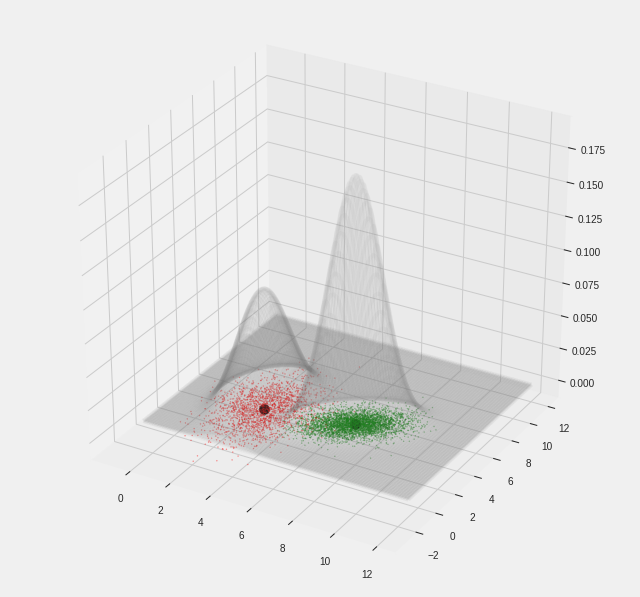

In [0]:
plot_gmm(d1, d2, mean, cov)